In [3]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt
file_path = r"C:\Users\katie\Desktop\NASA_SpecToSDT\relabeled_2021-2023(1s).csv"  # 請替換為實際的檔案路徑
# file_path = r"G:\.shortcut-targets-by-id\18mo324Z2AldlYbCwei6OjEGuCbyFL8b7\NASA\DSCOVR PlasMAG data\resample_by_median\eval_data\2016_2020_combined.csv"  # 請替換為實際的檔案路徑

# 讀取 features 和 ground truth
df_combined= pd.read_csv(file_path)
df_combined



,Wave_1,Wave_2,Wave_3,Wave_4,Wave_5,Wave_6,Wave_7,Wave_8,Wave_9,Wave_10,...,Wave_44,Wave_45,Wave_46,Wave_47,Wave_48,Wave_49,Wave_50,proton_speed,proton_density,proton_temperature
0,43.823260,2.830913,60.959332,56.463687,107.075067,183.099150,332.324650,336.454783,323.833317,179.073633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301.178333,6.701167,16466.483330
1,45.433233,4.779310,60.246778,56.820692,110.880248,209.736617,393.978650,392.282633,334.534717,180.483800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.565000,8.056500,15541.950000
2,43.531168,3.102756,59.870720,55.869275,105.002733,180.885283,338.512200,331.631700,307.628800,169.613783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.106667,6.493000,14967.466670
3,46.383945,10.478343,62.799772,52.630103,97.463127,172.121267,350.414617,391.734567,365.811017,205.273550,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.921667,7.681500,16916.416670
4,44.569842,6.065544,65.046303,66.159578,126.063822,209.567517,356.859650,355.688233,340.846167,198.153683,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.400000,7.859667,18842.666670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,9.450048,0.231726,18.457912,16.208867,29.260930,22.668535,42.375802,54.242392,170.961433,167.907767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,345.620000,1.085000,9897.883333
1287,4.701248,0.231726,16.511683,12.893430,25.737558,16.653353,33.739200,38.415275,148.493333,154.645075,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,364.823333,1.128889,10113.406780
1288,5.178857,0.231726,17.514158,14.500828,26.131820,16.891672,33.742042,38.885440,152.184383,163.547967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,340.465000,1.067000,8290.700000
1289,0.960995,0.231726,9.184949,11.248907,26.501357,7.708540,20.825741,19.970956,135.741048,182.435533,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,447.070000,1.809808,59348.666670


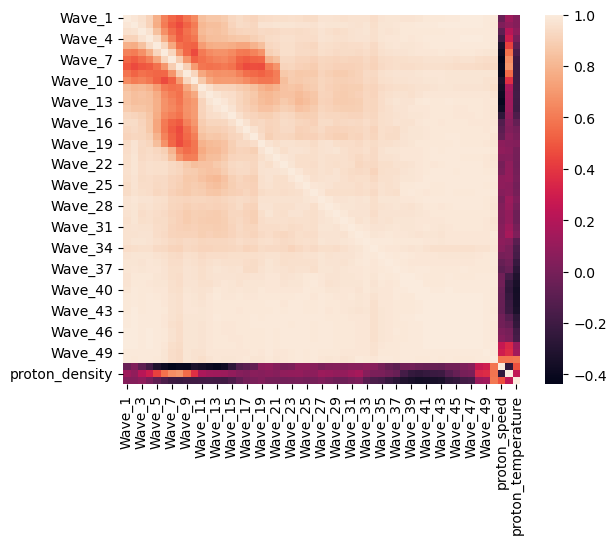

In [4]:
sns.heatmap(df_combined.corr());

In [5]:
# 找出資料中每列的缺失值比例
missing_ratio = df_combined.isnull().mean()

cols_dropped = ['Wave_42', 'Wave_43', 'Wave_44', 'Wave_45', 'Wave_46', 'Wave_47', 'Wave_48', 'Wave_49', 'Wave_50']

cols_filled = ['Wave_1', 'Wave_2', 'Wave_3', 'Wave_4', 'Wave_5', 'Wave_6', 'Wave_7', 'Wave_8', 'Wave_9', 'Wave_10', 'Wave_11', 'Wave_12', 'Wave_13', 'Wave_14', 'Wave_15', 'Wave_16', 'Wave_17', 'Wave_20', 'Wave_21', 'Wave_22', 'Wave_23', 'Wave_24', 'Wave_25', 'Wave_26', 'Wave_27', 'Wave_28', 'Wave_29', 'Wave_30', 'Wave_31', 'Wave_32', 'Wave_33', 'Wave_34', 'Wave_35', 'Wave_36', 'Wave_37', 'Wave_38', 'Wave_39', 'Wave_40', 'Wave_41']

df_combined = df_combined.drop(columns=cols_dropped)

for col in cols_filled:
    df_combined[col].fillna(df_combined[col].median(), inplace=True)

print(f"被刪除的列數：{cols_dropped}")
print(f"平均數填充的列數：{cols_filled}")

被刪除的列數：['Wave_42', 'Wave_43', 'Wave_44', 'Wave_45', 'Wave_46', 'Wave_47', 'Wave_48', 'Wave_49', 'Wave_50']
平均數填充的列數：['Wave_1', 'Wave_2', 'Wave_3', 'Wave_4', 'Wave_5', 'Wave_6', 'Wave_7', 'Wave_8', 'Wave_9', 'Wave_10', 'Wave_11', 'Wave_12', 'Wave_13', 'Wave_14', 'Wave_15', 'Wave_16', 'Wave_17', 'Wave_20', 'Wave_21', 'Wave_22', 'Wave_23', 'Wave_24', 'Wave_25', 'Wave_26', 'Wave_27', 'Wave_28', 'Wave_29', 'Wave_30', 'Wave_31', 'Wave_32', 'Wave_33', 'Wave_34', 'Wave_35', 'Wave_36', 'Wave_37', 'Wave_38', 'Wave_39', 'Wave_40', 'Wave_41']


In [6]:
df_combined

,Wave_1,Wave_2,Wave_3,Wave_4,Wave_5,Wave_6,Wave_7,Wave_8,Wave_9,Wave_10,...,Wave_35,Wave_36,Wave_37,Wave_38,Wave_39,Wave_40,Wave_41,proton_speed,proton_density,proton_temperature
0,43.823260,2.830913,60.959332,56.463687,107.075067,183.099150,332.324650,336.454783,323.833317,179.073633,...,363.034058,328.756143,349.857781,362.816,380.246417,362.331442,416.23395,301.178333,6.701167,16466.483330
1,45.433233,4.779310,60.246778,56.820692,110.880248,209.736617,393.978650,392.282633,334.534717,180.483800,...,363.034058,328.756143,349.857781,362.816,380.246417,362.331442,416.23395,300.565000,8.056500,15541.950000
2,43.531168,3.102756,59.870720,55.869275,105.002733,180.885283,338.512200,331.631700,307.628800,169.613783,...,363.034058,328.756143,349.857781,362.816,380.246417,362.331442,416.23395,300.106667,6.493000,14967.466670
3,46.383945,10.478343,62.799772,52.630103,97.463127,172.121267,350.414617,391.734567,365.811017,205.273550,...,363.034058,328.756143,349.857781,362.816,380.246417,362.331442,416.23395,302.921667,7.681500,16916.416670
4,44.569842,6.065544,65.046303,66.159578,126.063822,209.567517,356.859650,355.688233,340.846167,198.153683,...,363.034058,328.756143,349.857781,362.816,380.246417,362.331442,416.23395,300.400000,7.859667,18842.666670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,9.450048,0.231726,18.457912,16.208867,29.260930,22.668535,42.375802,54.242392,170.961433,167.907767,...,363.034058,328.756143,349.857781,362.816,380.246417,362.331442,416.23395,345.620000,1.085000,9897.883333
1287,4.701248,0.231726,16.511683,12.893430,25.737558,16.653353,33.739200,38.415275,148.493333,154.645075,...,363.034058,328.756143,349.857781,362.816,380.246417,362.331442,416.23395,364.823333,1.128889,10113.406780
1288,5.178857,0.231726,17.514158,14.500828,26.131820,16.891672,33.742042,38.885440,152.184383,163.547967,...,363.034058,328.756143,349.857781,362.816,380.246417,362.331442,416.23395,340.465000,1.067000,8290.700000
1289,0.960995,0.231726,9.184949,11.248907,26.501357,7.708540,20.825741,19.970956,135.741048,182.435533,...,363.034058,328.756143,349.857781,362.816,380.246417,362.331442,416.23395,447.070000,1.809808,59348.666670


In [7]:

# Step2. replace outliers with boundaries
Q1 = df_combined.quantile(0.25)
Q3 = df_combined.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for column in df_combined.columns:
    df_combined[column] = df_combined[column].apply(lambda x, col=column: upper_bound[col] if x > upper_bound[col] else x)
    df_combined[column] = df_combined[column].apply(lambda x, col=column: lower_bound[col] if x < lower_bound[col] else x)


In [8]:
df_combined

,Wave_1,Wave_2,Wave_3,Wave_4,Wave_5,Wave_6,Wave_7,Wave_8,Wave_9,Wave_10,...,Wave_35,Wave_36,Wave_37,Wave_38,Wave_39,Wave_40,Wave_41,proton_speed,proton_density,proton_temperature
0,43.823260,2.830913,60.959332,56.463687,107.075067,183.099150,332.324650,336.454783,323.833317,179.073633,...,363.034058,328.756143,349.857781,362.816,380.246417,362.331442,416.23395,301.178333,6.701167,16466.483330
1,45.433233,4.779310,60.246778,56.820692,110.880248,209.736617,393.978650,392.282633,334.534717,180.483800,...,363.034058,328.756143,349.857781,362.816,380.246417,362.331442,416.23395,300.565000,8.056500,15541.950000
2,43.531168,3.102756,59.870720,55.869275,105.002733,180.885283,338.512200,331.631700,307.628800,169.613783,...,363.034058,328.756143,349.857781,362.816,380.246417,362.331442,416.23395,300.106667,6.493000,14967.466670
3,46.383945,10.478343,62.799772,52.630103,97.463127,172.121267,350.414617,391.734567,365.811017,205.273550,...,363.034058,328.756143,349.857781,362.816,380.246417,362.331442,416.23395,302.921667,7.681500,16916.416670
4,44.569842,6.065544,65.046303,66.159578,126.063822,209.567517,356.859650,355.688233,340.846167,198.153683,...,363.034058,328.756143,349.857781,362.816,380.246417,362.331442,416.23395,300.400000,7.859667,18842.666670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,9.450048,0.231726,18.457912,16.208867,29.260930,22.668535,42.375802,54.242392,170.961433,167.907767,...,363.034058,328.756143,349.857781,362.816,380.246417,362.331442,416.23395,345.620000,1.085000,9897.883333
1287,4.701248,0.231726,16.511683,12.893430,25.737558,16.653353,33.739200,38.415275,148.493333,154.645075,...,363.034058,328.756143,349.857781,362.816,380.246417,362.331442,416.23395,364.823333,1.128889,10113.406780
1288,5.178857,0.231726,17.514158,14.500828,26.131820,16.891672,33.742042,38.885440,152.184383,163.547967,...,363.034058,328.756143,349.857781,362.816,380.246417,362.331442,416.23395,340.465000,1.067000,8290.700000
1289,0.960995,0.231726,9.184949,11.248907,26.501357,7.708540,20.825741,19.970956,135.741048,182.435533,...,363.034058,328.756143,349.857781,362.816,380.246417,362.331442,416.23395,378.220947,1.809808,44439.591677


In [9]:
df_combined['proton_temperature'] = np.log1p(df_combined['proton_temperature'])


# Drop unwanted columns
df_features = df_combined.drop(columns=['proton_speed', 'proton_density', 'proton_temperature'])

# Perform feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)

# Create a new DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=df_features.columns)

df_combined_scaled = df_combined.copy()  # Create a copy of df_combined to avoid modifying the original DataFrame
df_combined_scaled[df_features.columns] = scaled_features

df_combined_scaled


,Wave_1,Wave_2,Wave_3,Wave_4,Wave_5,Wave_6,Wave_7,Wave_8,Wave_9,Wave_10,...,Wave_35,Wave_36,Wave_37,Wave_38,Wave_39,Wave_40,Wave_41,proton_speed,proton_density,proton_temperature
0,-0.882897,-1.150460,-0.863338,-0.873059,-0.572047,-0.247516,0.041536,-0.023497,-0.179501,-0.538873,...,-5.684342e-14,5.684342e-14,5.684342e-14,0.0,5.684342e-14,-5.684342e-14,1.705303e-13,301.178333,6.701167,9.709143
1,-0.844965,-1.062534,-0.876901,-0.867551,-0.538008,-0.097634,0.294194,0.184769,-0.126629,-0.529776,...,-5.684342e-14,5.684342e-14,5.684342e-14,0.0,5.684342e-14,-5.684342e-14,1.705303e-13,300.565000,8.056500,9.651362
2,-0.889779,-1.138192,-0.884059,-0.882230,-0.590584,-0.259973,0.066893,-0.041490,-0.259563,-0.599898,...,-5.684342e-14,5.684342e-14,5.684342e-14,0.0,5.684342e-14,-5.684342e-14,1.705303e-13,300.106667,6.493000,9.613701
3,-0.822565,-0.805350,-0.828308,-0.932203,-0.658028,-0.309286,0.115669,0.182725,0.027898,-0.369858,...,-5.684342e-14,5.684342e-14,5.684342e-14,0.0,5.684342e-14,-5.684342e-14,1.705303e-13,302.921667,7.681500,9.736099
4,-0.865307,-1.004489,-0.785548,-0.723473,-0.402187,-0.098586,0.142081,0.048253,-0.095446,-0.415788,...,-5.684342e-14,5.684342e-14,5.684342e-14,0.0,5.684342e-14,-5.684342e-14,1.705303e-13,300.400000,7.859667,9.843932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286,-1.692757,-1.267755,-1.672296,-1.494101,-1.268116,-1.150216,-1.146676,-1.076297,-0.934794,-0.610904,...,-5.684342e-14,5.684342e-14,5.684342e-14,0.0,5.684342e-14,-5.684342e-14,1.705303e-13,345.620000,1.085000,9.200177
1287,-1.804643,-1.267755,-1.709340,-1.545250,-1.299634,-1.184061,-1.182068,-1.135340,-1.045802,-0.696461,...,-5.684342e-14,5.684342e-14,5.684342e-14,0.0,5.684342e-14,-5.684342e-14,1.705303e-13,364.823333,1.128889,9.221716
1288,-1.793390,-1.267755,-1.690259,-1.520452,-1.296107,-1.182720,-1.182057,-1.133586,-1.027566,-0.639028,...,-5.684342e-14,5.684342e-14,5.684342e-14,0.0,5.684342e-14,-5.684342e-14,1.705303e-13,340.465000,1.067000,9.023010
1289,-1.892766,-1.267755,-1.848794,-1.570622,-1.292801,-1.234391,-1.234988,-1.204147,-1.108807,-0.517185,...,-5.684342e-14,5.684342e-14,5.684342e-14,0.0,5.684342e-14,-5.684342e-14,1.705303e-13,378.220947,1.809808,10.701909


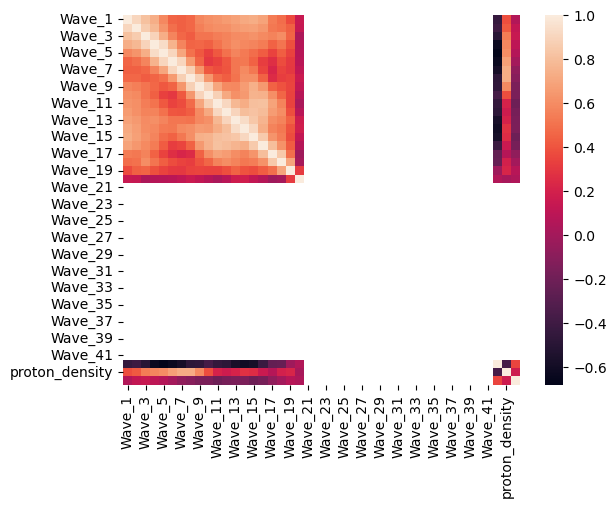

In [10]:
sns.heatmap(df_combined.corr());

In [11]:
df_combined_scaled.head()

,Wave_1,Wave_2,Wave_3,Wave_4,Wave_5,Wave_6,Wave_7,Wave_8,Wave_9,Wave_10,...,Wave_35,Wave_36,Wave_37,Wave_38,Wave_39,Wave_40,Wave_41,proton_speed,proton_density,proton_temperature
0,-0.882897,-1.150460,-0.863338,-0.873059,-0.572047,-0.247516,0.041536,-0.023497,-0.179501,-0.538873,...,-5.684342e-14,5.684342e-14,5.684342e-14,0.0,5.684342e-14,-5.684342e-14,1.705303e-13,301.178333,6.701167,9.709143
1,-0.844965,-1.062534,-0.876901,-0.867551,-0.538008,-0.097634,0.294194,0.184769,-0.126629,-0.529776,...,-5.684342e-14,5.684342e-14,5.684342e-14,0.0,5.684342e-14,-5.684342e-14,1.705303e-13,300.565000,8.056500,9.651362
2,-0.889779,-1.138192,-0.884059,-0.882230,-0.590584,-0.259973,0.066893,-0.041490,-0.259563,-0.599898,...,-5.684342e-14,5.684342e-14,5.684342e-14,0.0,5.684342e-14,-5.684342e-14,1.705303e-13,300.106667,6.493000,9.613701
3,-0.822565,-0.805350,-0.828308,-0.932203,-0.658028,-0.309286,0.115669,0.182725,0.027898,-0.369858,...,-5.684342e-14,5.684342e-14,5.684342e-14,0.0,5.684342e-14,-5.684342e-14,1.705303e-13,302.921667,7.681500,9.736099
4,-0.865307,-1.004489,-0.785548,-0.723473,-0.402187,-0.098586,0.142081,0.048253,-0.095446,-0.415788,...,-5.684342e-14,5.684342e-14,5.684342e-14,0.0,5.684342e-14,-5.684342e-14,1.705303e-13,300.400000,7.859667,9.843932


In [12]:
from sklearn.model_selection import train_test_split

# 將資料分割為 80% 的訓練資料和 20% 的測試資料
df_train, df_test = train_test_split(df_combined_scaled, test_size=0.2, random_state=42)

print(f"Training data shape: {df_train.shape}")
print(f"Testing data shape: {df_test.shape}")

# Train individual models and make predictions
X_train = df_train.drop(columns=['proton_speed', 'proton_density', 'proton_temperature'])
y_train = df_train[['proton_speed', 'proton_density', 'proton_temperature']].values
X_test = df_test.drop(columns=['proton_speed', 'proton_density', 'proton_temperature'])
y_test = df_test[['proton_speed', 'proton_density', 'proton_temperature']].values

Training data shape: (1032, 44)
Testing data shape: (259, 44)


In [13]:
min_value = df_combined['proton_temperature'].min()
max_value = df_combined['proton_temperature'].max()

print(f"proton_temperature 的最小值: {min_value}")
print(f"proton_temperature 的最大值: {max_value}")

proton_temperature 的最小值: 7.601402334583733
proton_temperature 的最大值: 10.701908557740092


In [14]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import uniform, randint

# Define the parameter grid
param_dist = {
    'subsample': uniform(0.1, 0.9),
    'n_estimators': randint(10, 200),
    'max_depth': randint(1, 10),
    'learning_rate': uniform(0.01, 0.3),
    'lambda': uniform(0.1, 0.9),
    'gamma': uniform(0, 1),
    'colsample_bytree': uniform(0.1, 0.9),
    'alpha': uniform(0.1, 0.9),
    'eval_metric': ['rmse'],
    'tree_method': ['hist'],
    'device': ['gpu']
}

# Create XGBoost models
xgb_speed = XGBRegressor()
xgb_dense = XGBRegressor()
xgb_temp = XGBRegressor()

# Create RandomizedSearchCV objects for each model
random_search_speed = RandomizedSearchCV(estimator=xgb_speed, param_distributions=param_dist,
                                         n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42)

random_search_dense = RandomizedSearchCV(estimator=xgb_dense, param_distributions=param_dist,
                                         n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42)

random_search_temp = RandomizedSearchCV(estimator=xgb_temp, param_distributions=param_dist,
                                        n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42)

# Fit the RandomizedSearchCV objects to the data
random_search_speed.fit(X_train, y_train[:, 0])
random_search_dense.fit(X_train, y_train[:, 1])
random_search_temp.fit(X_train, y_train[:, 2])

# Print the best parameters found for each model
print("Best Parameters for Speed Model: ", random_search_speed.best_params_)
print("Best Parameters for Density Model: ", random_search_dense.best_params_)
print("Best Parameters for Temperature Model: ", random_search_temp.best_params_)

# Get the best models
best_speed_model = random_search_speed.best_estimator_
best_dense_model = random_search_dense.best_estimator_
best_temp_model = random_search_temp.best_estimator_

# Make predictions using the best models
spd_preds_test = best_speed_model.predict(X_test)
den_preds_test = best_dense_model.predict(X_test)
tmp_preds_test = best_temp_model.predict(X_test)



C:\Users\katie\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:30:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Best Parameters for Speed Model:  {'alpha': 0.4498095607205338, 'colsample_bytree': 0.34421412859650635, 'device': 'gpu', 'eval_metric': 'rmse', 'gamma': 0.8287375091519293, 'lambda': 0.4210779940242304, 'learning_rate': 0.09428035290621423, 'max_depth': 9, 'n_estimators': 166, 'subsample': 0.8219772826786357, 'tree_method': 'hist'}
Best Parameters for Density Model:  {'alpha': 0.13094966900369656, 'colsample_bytree': 0.9183883618709039, 'device': 'gpu', 'eval_metric': 'rmse', 'gamma': 0.2587799816000169, 'lambda': 0.6962700559185838, 'learning_rate': 0.10351332282682328, 'max_depth': 6, 'n_estimators': 63, 'subsample': 0.5920392514089517, 'tree_method': 'hist'}
Best Parameters for Temperature Model:  {'alpha': 0.827557613304815, 'colsample_bytree': 0.3741523922560336, 'device': 'gpu', 'eval_metric': 'rmse', 'gamma': 0.09767211400638387, 'lambda': 0.7158097238609412, 'learning_rate': 0.1420457481218804, 'max_depth': 7, 'n_estimators': 181, 'subsample': 0.5456592191001431, 'tree_method'

C:\Users\katie\anaconda3\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\katie\anaconda3\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\katie\anaconda3\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


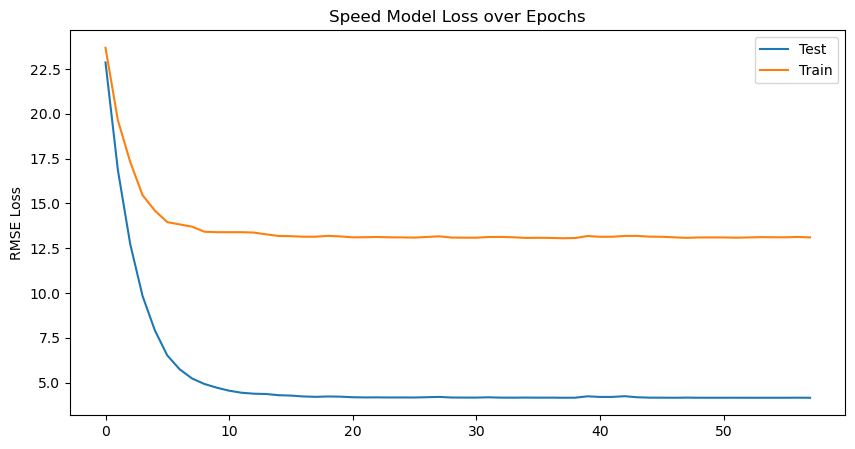

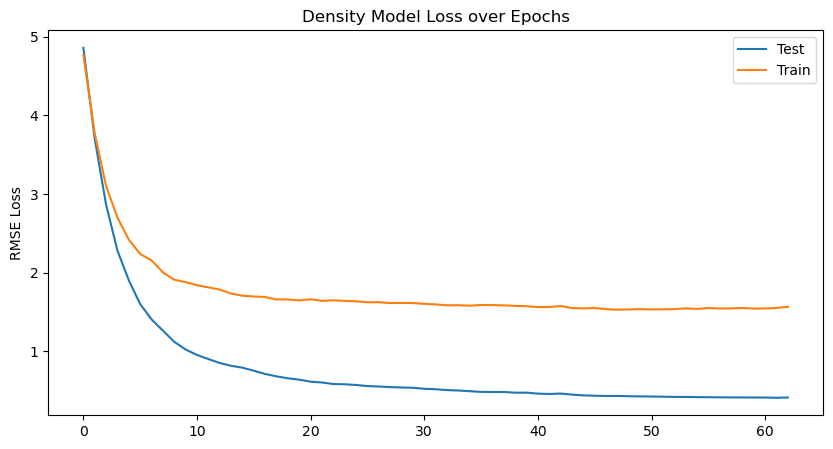

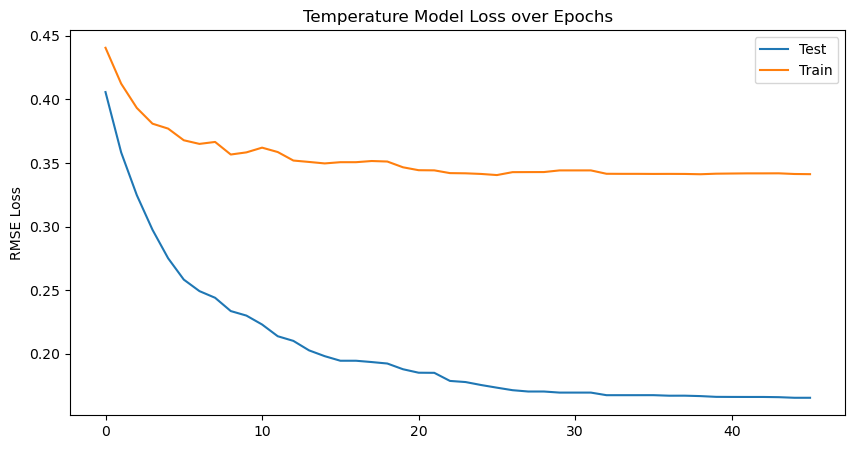

XGBoost Speed Training RMSE: 4.150152530560455
XGBoost Speed Validation RMSE: 13.104808913668244
-------------------------
XGBoost Density Training RMSE: 0.4143859970607645
XGBoost Density Validation RMSE: 1.5666532021324224
-------------------------
XGBoost Temperature Training RMSE: 0.16546370092917187
XGBoost Temperature Validation RMSE: 0.34128976208519823
-------------------------


In [19]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.base import clone


params_speed =  {'alpha': 0.4498095607205338, 'colsample_bytree': 0.34421412859650635, 'device': 'gpu', 'eval_metric': 'rmse', 'gamma': 0.8287375091519293, 'lambda': 0.4210779940242304, 'learning_rate': 0.09428035290621423, 'max_depth': 9, 'n_estimators': 166, 'subsample': 0.8219772826786357, 'tree_method': 'hist', 'device': 'gpu'}
params_dense = {'alpha': 0.13094966900369656, 'colsample_bytree': 0.9183883618709039, 'device': 'gpu', 'eval_metric': 'rmse', 'gamma': 0.2587799816000169, 'lambda': 0.6962700559185838, 'learning_rate': 0.10351332282682328, 'max_depth': 6, 'n_estimators': 63, 'subsample': 0.5920392514089517, 'tree_method': 'hist', 'device': 'gpu'}
params_temp = {'alpha': 0.827557613304815, 'colsample_bytree': 0.3741523922560336, 'device': 'gpu', 'eval_metric': 'rmse', 'gamma': 0.09767211400638387, 'lambda': 0.7158097238609412, 'learning_rate': 0.1420457481218804, 'max_depth': 7, 'n_estimators': 181, 'subsample': 0.5456592191001431, 'tree_method': 'hist', 'device': 'gpu'}

def print_metrics(predictions, y_test, model_name):
    """Print model metrics."""
    print(f"{model_name} prediction error:", mean_squared_error(predictions, y_test))
    print(f"{model_name} prediction RMSE:", np.sqrt(mean_squared_error(predictions, y_test)))
    print(f"{model_name} prediction MAE:", mean_absolute_error(predictions, y_test))
    print(f"{model_name} R-squared:", r2_score(predictions, y_test))
    print(f"{model_name} Mean Bias Deviation (%):", ((predictions - y_test) / y_test).mean() * 100)
    print("-------------------------")

def plot_xgb_loss(model, title):
    results = model.evals_result()
    epochs = len(results['validation_0']['rmse'])
    x_axis = range(0, epochs)
    plt.figure(figsize=(10, 5))
    plt.plot(x_axis, results['validation_0']['rmse'], label='Test')  # Test set
    plt.plot(x_axis, results['validation_1']['rmse'], label='Train')  # Training set
    plt.legend()
    plt.ylabel('RMSE Loss')
    plt.title(title)
    plt.show()

    
def learning_rate_decay(t, initial_lr=0.1, decay_factor=0.01):
    """Function to decay learning rate based on iteration."""
    initial_lrs = [0.01, 0.05, 0.1, 0.5]
    decay_factors = [0.001, 0.01, 0.1]
    return initial_lr / (1 + decay_factor * t)

def print_rmse_from_evals(model, model_name):
    """Print training and validation RMSE from model's evaluation results."""
    evals_result = model.evals_result()
    train_rmse = evals_result['validation_0']['rmse'][-1]
    val_rmse = evals_result['validation_1']['rmse'][-1]
    
    print(f"{model_name} Training RMSE: {train_rmse}")
    print(f"{model_name} Validation RMSE: {val_rmse}")
    print("-------------------------")
    
# Update parameters with the learning rate decay function
params_speed['learning_rate'] = learning_rate_decay
params_dense['learning_rate'] = learning_rate_decay
params_temp['learning_rate'] = learning_rate_decay


xgb_speed = XGBRegressor(**params_speed)
xgb_dense = XGBRegressor(**params_dense)
xgb_temp = XGBRegressor(**params_temp)

eval_set_speed = [(X_train, y_train[:, 0]), (X_test, y_test[:, 0])]
eval_set_dense = [(X_train, y_train[:, 1]), (X_test, y_test[:, 1])]
eval_set_temp = [(X_train, y_train[:, 2]), (X_test, y_test[:, 2])]

# Set a smaller early_stopping_rounds value
early_stop_rounds = 20

xgb_speed.fit(X_train, y_train[:, 0], eval_set=eval_set_speed, verbose=False, early_stopping_rounds=early_stop_rounds)
xgb_dense.fit(X_train, y_train[:, 1], eval_set=eval_set_dense, verbose=False, early_stopping_rounds=early_stop_rounds)
xgb_temp.fit(X_train, y_train[:, 2], eval_set=eval_set_temp, verbose=False, early_stopping_rounds=early_stop_rounds)

spd_preds_test = xgb_speed.predict(X_test)
den_preds_test = xgb_dense.predict(X_test)
tmp_preds_test = xgb_temp.predict(X_test)

plot_xgb_loss(xgb_speed, 'Speed Model Loss over Epochs')
plot_xgb_loss(xgb_dense, 'Density Model Loss over Epochs')
plot_xgb_loss(xgb_temp, 'Temperature Model Loss over Epochs')

print_rmse_from_evals(xgb_speed, "XGBoost Speed")
print_rmse_from_evals(xgb_dense, "XGBoost Density")
print_rmse_from_evals(xgb_temp, "XGBoost Temperature")

In [20]:
# Stack these predictions to form new features for the test set
X_test_stacked = np.column_stack([spd_preds_test, den_preds_test, tmp_preds_test])

# Define and train the stacked models
stacked_speed_model = XGBRegressor(**params_speed)
stacked_speed_model.fit(X_test_stacked, y_test[:, 0])

stacked_dense_model = XGBRegressor(**params_dense)
stacked_dense_model.fit(X_test_stacked, y_test[:, 1])

stacked_temp_model = XGBRegressor(**params_temp)
stacked_temp_model.fit(X_test_stacked, y_test[:, 2])

# Get final predictions using the stacked models
stacked_speed_pred = stacked_speed_model.predict(X_test_stacked)
stacked_dense_pred = stacked_dense_model.predict(X_test_stacked)
stacked_temp_pred = stacked_temp_model.predict(X_test_stacked)

# Print metrics for each prediction
print_metrics(stacked_speed_pred, y_test[:, 0], "Stacked Speed")
print_metrics(stacked_dense_pred, y_test[:, 1], "Stacked Density")
print_metrics(stacked_temp_pred, y_test[:, 2], "Stacked Temperature")

Stacked Speed prediction error: 18.28835824777492
Stacked Speed prediction RMSE: 4.276489009429922
Stacked Speed prediction MAE: 0.9644131845001814
Stacked Speed R-squared: 0.9795942670412501
Stacked Speed Mean Bias Deviation (%): 0.019135453187120084
-------------------------
Stacked Density prediction error: 0.16504719031688725
Stacked Density prediction RMSE: 0.40626000334377893
Stacked Density prediction MAE: 0.27920806839950074
Stacked Density R-squared: 0.995928826066532
Stacked Density Mean Bias Deviation (%): 0.883816739290921
-------------------------
Stacked Temperature prediction error: 0.058926070362232415
Stacked Temperature prediction RMSE: 0.24274692657628524
Stacked Temperature prediction MAE: 0.17864926193352196
Stacked Temperature R-squared: 0.5996421490418322
Stacked Temperature Mean Bias Deviation (%): 0.07263372686244683
-------------------------


In [21]:
# 載入模型
import joblib
joblib.dump(stacked_speed_model, 'stacked_speed_model.pkl')
joblib.dump(stacked_dense_model, 'stacked_dense_model.pkl')
joblib.dump(stacked_temp_model, 'stacked_temp_model.pkl')

['stacked_temp_model.pkl']